In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
print(df.isnull().sum()) #- no null values are present

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
print(df.duplicated().sum())

240


In [8]:
## as 240 our duplicated so we need to drop them
df.drop_duplicates(inplace=True)

In [9]:
print(df.duplicated().sum())

0


In [10]:
print(df.shape)

(1359, 12)


In [11]:
print(df['quality'].value_counts())

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


In [12]:
## as values for 4,8 and 3 are less in comparison to other so it means data is imbalanced.
## let's draw a pie chart for it.

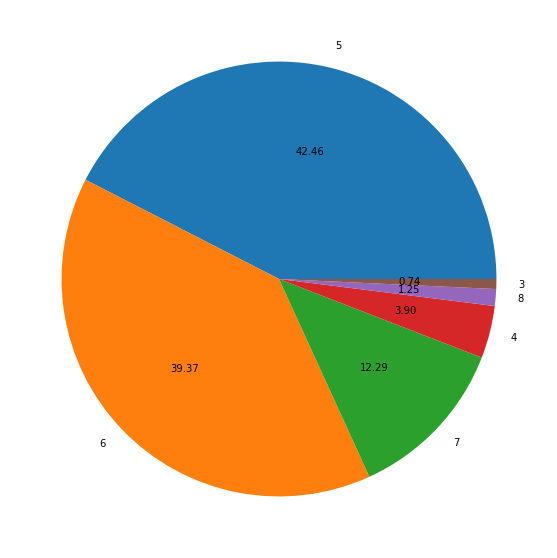

<class 'pandas.core.series.Series'>
5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


In [15]:
d1 = df['quality'].value_counts()
plt.figure(figsize = (12,10)) ## - The figsize attribute allows us to specify the width and height of
# a figure in unit inches. The figsize attribute is a parameter of the function figure(). It is an 
#optional attribute, by default the figure has the dimensions as (6.4, 4.8).
plt.pie(x = d1,labels = d1.index,autopct = '%.2f')##autopct is used to mark the wedges with the values
plt.show()
print(type(d1))
print(d1)

In [21]:
## it is highly possible for 4,3 and 8 that they will not enter the test data when we will split
## because their value counts are very less

In [22]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(1359, 11)
(1359,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1019, 11)
(340, 11)
(1019,)
(340,)


In [46]:
def gen_met_classifier(y_test,ypred_m) :
    cm = confusion_matrix(y_test,ypred_m)
    print(cm) 
    print(classification_report(y_test,ypred_m,zero_division = 0)) #zero_division will give 0 if there
                                                                   # is any zero division.
def model_score(m) :
    print("Training Score :",m.score(x_train,y_train))
    print("Testing Score :",m.score(x_test,y_test))

In [47]:
m1 = SVC(kernel = 'linear',C = 1)
m1.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [48]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[6 5 5 6 6 5 5 5 6 6 6 5 6 6 5 6 5 6 6 6 5 5 6 5 6 5 6 5 6 6 5 6 5 5 5 5 5
 6 5 5 5 5 6 6 6 5 6 5 5 6 5 5 6 5 6 5 6 5 5 5 6 5 5 6 6 6 6 5 6 6 5 5 6 6
 6 5 5 5 5 6 5 6 6 5 6 5 5 6 6 5 6 5 5 5 6 5 6 5 5 6 5 5 5 6 5 6 5 5 5 6 6
 5 5 6 5 5 5 6 5 5 6 6 5 5 5 6 6 5 5 5 6 5 6 5 6 6 5 5 5 5 5 5 6 6 6 6 6 6
 5 5 6 6 6 5 5 6 5 5 5 5 5 5 5 6 6 6 5 5 6 6 5 6 6 5 6 6 6 5 6 5 6 5 6 6 5
 5 5 6 5 6 6 5 6 5 6 6 5 5 5 6 6 6 6 6 6 5 6 5 5 5 6 6 5 5 6 6 5 6 6 6 6 5
 5 5 5 6 5 5 5 5 5 5 6 6 5 5 5 5 6 5 5 5 5 5 6 6 5 5 5 6 5 6 5 5 6 5 5 6 6
 6 5 5 6 6 5 5 5 6 5 6 6 6 5 6 5 6 5 6 6 5 6 6 6 5 6 6 5 6 6 5 6 5 6 6 5 6
 6 6 5 5 5 5 5 5 5 6 5 5 5 6 5 6 6 6 6 5 5 6 5 6 5 6 5 5 5 5 5 5 6 5 5 6 5
 5 5 6 5 6 6 5]


In [49]:
model_score(m1)
print("ACCURACY :",accuracy_score(y_test,ypred_m1))

Training Score : 0.5740922473012757
Testing Score : 0.5794117647058824
ACCURACY : 0.5794117647058824


In [50]:
gen_met_classifier(y_test,ypred_m1) #- we are getting results for only 5 and 6

[[  0   0   1   0   0   0]
 [  0   0   9   6   0   0]
 [  0   0 116  24   0   0]
 [  0   0  57  81   0   0]
 [  0   0   2  39   0   0]
 [  0   0   0   5   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15
           5       0.63      0.83      0.71       140
           6       0.52      0.59      0.55       138
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00         5

    accuracy                           0.58       340
   macro avg       0.19      0.24      0.21       340
weighted avg       0.47      0.58      0.52       340



In [64]:
m2 = KNeighborsClassifier(n_neighbors = 20)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [65]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[4 5 6 5 6 7 5 6 5 6 7 5 6 6 5 5 5 6 5 5 6 5 5 5 5 5 6 5 6 6 6 6 5 5 5 6 5
 7 5 5 5 5 6 6 6 6 7 5 6 6 5 5 6 5 5 5 5 6 6 6 6 5 5 5 6 6 6 5 6 6 5 6 5 5
 6 6 5 5 6 5 6 6 5 5 6 5 5 5 6 5 5 5 6 5 5 5 6 6 6 6 5 6 5 6 5 6 5 6 5 5 5
 5 6 6 5 5 5 5 5 6 6 5 6 5 5 5 6 5 5 6 5 5 6 5 6 6 5 5 5 5 5 5 6 6 5 6 6 6
 5 5 6 5 6 5 6 6 6 5 5 5 5 5 5 6 5 5 5 5 6 6 6 5 6 5 6 5 7 6 6 5 6 5 6 6 5
 5 5 7 5 5 5 5 5 5 5 6 5 5 6 6 5 6 5 6 5 5 7 5 5 5 6 6 6 6 5 5 5 5 5 5 6 6
 5 6 5 6 6 6 5 6 5 5 5 6 5 5 5 5 6 5 5 5 5 6 5 5 5 5 5 6 5 6 5 5 5 5 5 7 5
 6 5 5 5 5 5 5 5 6 6 6 6 6 5 5 5 5 5 5 5 5 6 7 5 6 6 6 5 6 6 5 6 6 6 5 6 6
 6 6 6 6 6 5 5 5 6 6 5 6 6 5 5 7 5 5 5 5 5 6 5 5 6 5 5 5 5 6 5 5 6 5 5 5 5
 5 5 6 5 6 5 5]


In [66]:
model_score(m2)
print("Accuracy :",accuracy_score(y_test,ypred_m2))

Training Score : 0.5672227674190383
Testing Score : 0.47941176470588237
Accuracy : 0.47941176470588237


In [68]:
gen_met_classifier(y_test,ypred_m2) # - values are only for 5,6,7

[[ 0  0  1  0  0  0]
 [ 0  0 11  4  0  0]
 [ 0  1 98 39  2  0]
 [ 0  0 75 60  3  0]
 [ 0  0 12 24  5  0]
 [ 0  0  1  4  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15
           5       0.49      0.70      0.58       140
           6       0.46      0.43      0.45       138
           7       0.50      0.12      0.20        41
           8       0.00      0.00      0.00         5

    accuracy                           0.48       340
   macro avg       0.24      0.21      0.20       340
weighted avg       0.45      0.48      0.44       340



In [96]:
m3 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 6,min_samples_split = 15)
m3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=15)

In [97]:
ypred_m3 = m3.predict(x_test)
print(ypred_m3)

[4 5 5 6 6 6 5 6 5 6 7 5 6 6 5 7 5 6 6 5 5 5 6 5 6 5 6 6 6 7 5 6 6 5 5 5 5
 6 5 5 5 5 7 7 6 6 6 5 5 6 5 5 7 5 6 5 6 5 5 5 7 5 6 6 6 6 6 5 6 5 7 5 7 6
 6 4 5 5 6 6 6 5 5 5 6 4 5 5 6 4 6 5 6 5 6 5 6 6 5 5 6 5 5 6 5 6 5 5 6 6 6
 5 5 6 5 5 5 5 5 6 6 6 5 5 5 5 6 6 5 6 6 6 6 5 6 6 6 5 5 5 5 5 6 5 7 6 7 6
 5 5 6 5 6 5 5 6 5 5 5 5 5 6 5 6 5 6 4 5 7 6 5 5 7 5 6 7 6 5 6 5 6 6 7 5 6
 5 5 6 5 6 6 5 8 5 6 5 5 5 5 6 5 6 7 7 5 5 7 5 5 5 6 7 5 6 7 7 5 5 6 5 7 5
 6 5 6 6 6 3 5 5 5 5 6 5 5 6 5 5 6 5 5 5 5 5 6 6 5 6 5 5 5 7 5 5 5 5 5 6 6
 6 4 5 6 5 5 5 5 6 5 7 6 6 5 7 5 6 5 6 7 5 7 6 6 5 6 5 5 6 5 5 6 5 4 7 6 6
 5 6 6 4 5 5 5 5 6 6 5 4 6 7 5 7 6 5 6 5 6 6 5 5 5 6 5 5 5 5 5 6 7 6 5 7 5
 5 5 6 5 6 6 5]


In [98]:
model_score(m3)
print("Accuracy :",accuracy_score(y_test,ypred_m3))

Training Score : 0.6653581943081452
Testing Score : 0.5617647058823529
Accuracy : 0.5617647058823529


In [99]:
gen_met_classifier(y_test,ypred_m3) #-  values for only 4,5,6,7

[[  0   0   1   0   0   0]
 [  0   2  12   1   0   0]
 [  1   3 102  33   1   0]
 [  0   4  51  70  12   1]
 [  0   0   5  19  17   0]
 [  0   0   0   3   2   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.22      0.13      0.17        15
           5       0.60      0.73      0.66       140
           6       0.56      0.51      0.53       138
           7       0.53      0.41      0.47        41
           8       0.00      0.00      0.00         5

    accuracy                           0.56       340
   macro avg       0.32      0.30      0.30       340
weighted avg       0.54      0.56      0.55       340



In [122]:
m4 = RandomForestClassifier(criterion = 'entropy',max_depth = 6,min_samples_split = 12,n_estimators = 40)
m4.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=12,
                       n_estimators=40)

In [123]:
ypred_m4 = m4.predict(x_test)
print(ypred_m4)

[5 5 6 6 6 5 5 5 5 6 7 5 6 6 5 7 5 6 6 6 5 5 5 5 6 5 6 5 6 7 5 6 5 5 5 5 5
 6 5 5 5 5 7 6 6 6 6 6 6 6 5 5 6 5 6 5 6 6 5 5 6 5 5 6 6 6 6 5 6 5 7 5 7 6
 6 5 5 5 6 6 5 6 6 6 6 5 5 5 6 5 6 5 5 5 6 5 6 5 5 5 6 5 5 6 5 6 5 5 6 6 6
 5 6 6 5 5 5 5 5 5 6 6 5 5 5 6 6 6 5 5 6 5 6 5 6 6 5 5 5 5 5 5 6 6 6 6 6 6
 5 5 6 6 6 5 5 6 5 5 5 6 5 5 5 6 6 6 5 5 7 6 5 5 7 5 6 6 6 5 6 5 6 5 6 6 5
 5 5 6 5 6 6 5 6 5 5 6 5 5 5 6 5 6 7 6 6 5 6 5 5 5 6 6 5 5 7 6 5 6 6 6 6 5
 6 6 6 6 6 5 5 5 5 5 5 6 5 6 5 5 6 5 5 5 6 5 6 6 5 5 5 6 5 7 5 5 6 5 5 6 6
 6 6 5 6 6 5 5 6 6 6 7 6 6 5 6 5 6 5 5 6 5 6 6 6 5 6 6 5 6 6 5 6 5 6 6 5 6
 6 6 6 6 5 5 5 5 5 6 5 5 5 7 5 7 6 6 6 6 6 6 5 6 5 5 5 6 5 5 5 5 7 6 5 6 5
 5 5 6 5 6 6 5]


In [124]:
model_score(m4)
print("Accuracy :",accuracy_score(y_test,ypred_m4))

Training Score : 0.6997055937193327
Testing Score : 0.6294117647058823
Accuracy : 0.6294117647058823


In [126]:
gen_met_classifier(y_test,ypred_m4) #- values for only 5,6,7

[[  0   0   1   0   0   0]
 [  0   0   9   6   0   0]
 [  0   0 113  27   0   0]
 [  0   0  44  90   4   0]
 [  0   0   3  27  11   0]
 [  0   0   0   5   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15
           5       0.66      0.81      0.73       140
           6       0.58      0.65      0.61       138
           7       0.73      0.27      0.39        41
           8       0.00      0.00      0.00         5

    accuracy                           0.63       340
   macro avg       0.33      0.29      0.29       340
weighted avg       0.60      0.63      0.60       340



In [136]:
m5 = LogisticRegression(max_iter = 6000) #- for increasing iterations
m5.fit(x_train,y_train)

LogisticRegression(max_iter=6000)

In [137]:
ypred_m5 = m5.predict(x_test)
print(ypred_m5)

[6 5 5 6 6 6 5 5 6 6 7 5 7 6 5 7 5 6 6 6 5 5 6 5 6 5 6 5 6 6 5 6 5 5 5 5 5
 6 5 5 5 5 7 6 6 5 6 5 6 6 5 5 6 5 6 5 6 6 5 5 6 5 5 7 6 6 6 5 6 6 5 5 6 6
 6 5 5 5 5 6 5 6 6 5 6 6 5 6 6 5 6 5 5 5 6 5 6 5 5 6 5 5 5 6 5 7 5 5 5 6 6
 5 5 6 5 5 5 6 5 5 6 6 5 5 5 5 6 6 5 5 6 5 6 5 6 6 5 5 5 5 5 5 6 6 6 6 6 6
 5 5 6 6 6 5 5 6 5 5 5 5 5 5 5 6 6 6 5 5 7 6 5 6 7 5 6 6 6 5 6 5 6 5 6 6 5
 5 5 6 5 6 6 5 6 5 6 6 5 5 5 6 6 6 6 7 6 5 7 5 5 5 6 6 5 5 7 6 5 6 6 6 6 5
 5 6 5 6 5 5 5 5 5 5 6 6 5 5 5 5 6 5 5 5 5 5 6 6 5 5 5 6 5 6 5 5 6 5 5 7 6
 6 5 5 6 5 5 5 5 6 5 6 7 6 5 6 5 6 5 6 6 5 6 6 7 5 6 6 5 6 6 5 6 5 6 6 5 6
 6 6 6 6 5 5 5 5 5 6 5 5 5 7 5 7 6 6 6 5 5 6 5 6 5 6 6 6 5 5 5 5 7 5 5 6 5
 5 5 6 5 6 6 5]


In [138]:
model_score(m5)
print("Accuracy : ",accuracy_score(y_test,ypred_m5))

Training Score : 0.5711481844946026
Testing Score : 0.6058823529411764
Accuracy :  0.6058823529411764


In [140]:
gen_met_classifier(y_test,ypred_m5) #-  values for only 5,6,7

[[  0   0   1   0   0   0]
 [  0   0   9   6   0   0]
 [  0   0 113  26   1   0]
 [  0   0  52  82   4   0]
 [  0   0   2  28  11   0]
 [  0   0   0   4   1   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15
           5       0.64      0.81      0.71       140
           6       0.56      0.59      0.58       138
           7       0.65      0.27      0.38        41
           8       0.00      0.00      0.00         5

    accuracy                           0.61       340
   macro avg       0.31      0.28      0.28       340
weighted avg       0.57      0.61      0.57       340



## naive bayes -

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
m6 = GaussianNB()
m6.fit(x_train,y_train)

GaussianNB()

In [143]:
ypred_m6 = m6.predict(x_test)
print(ypred_m6)

[6 5 6 6 6 6 5 5 5 6 7 5 6 6 5 7 5 6 6 6 6 5 7 5 6 5 8 5 6 7 6 6 6 5 5 5 5
 7 5 4 5 5 8 7 6 6 7 6 6 6 5 5 6 5 6 5 6 3 5 5 6 5 5 7 6 6 6 5 6 6 5 6 7 6
 6 5 5 5 6 5 6 4 5 5 6 6 5 6 6 3 6 5 6 5 6 3 6 4 5 6 6 5 5 6 5 7 5 5 5 6 6
 5 6 6 5 5 6 6 4 5 6 6 5 5 5 6 7 6 5 4 6 5 6 5 7 7 5 5 5 5 5 5 7 6 6 6 7 6
 5 5 6 6 7 5 5 6 5 5 5 6 5 5 5 6 7 6 5 5 7 7 5 5 8 5 6 6 7 5 6 5 6 5 7 6 6
 5 5 7 5 6 6 5 7 5 6 6 5 5 5 6 6 6 7 7 6 5 8 5 5 5 7 7 5 6 7 6 5 6 6 6 7 5
 6 4 6 6 6 6 5 6 5 5 6 7 5 5 5 5 7 5 5 5 6 5 6 6 5 6 5 6 5 7 5 5 6 4 5 7 6
 6 3 5 6 6 5 5 5 6 6 7 6 6 5 7 5 6 5 6 6 5 7 7 7 5 6 7 5 6 6 5 6 5 6 7 5 6
 6 7 6 6 6 5 5 5 6 6 5 5 6 7 5 7 6 6 6 5 5 6 5 6 5 6 6 6 5 5 5 5 8 6 5 6 5
 5 5 6 5 7 7 5]


In [144]:
model_score(m6)
print("Accuracy :",accuracy_score(y_test,ypred_m6))

Training Score : 0.5475956820412169
Testing Score : 0.5529411764705883
Accuracy : 0.5529411764705883


In [146]:
gen_met_classifier(y_test,ypred_m6) # - values for only 5,6,7

[[ 0  0  1  0  0  0]
 [ 2  0  7  6  0  0]
 [ 2  3 95 37  3  0]
 [ 0  4 38 73 22  1]
 [ 0  0  2 15 20  4]
 [ 0  0  0  5  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        15
           5       0.66      0.68      0.67       140
           6       0.54      0.53      0.53       138
           7       0.44      0.49      0.47        41
           8       0.00      0.00      0.00         5

    accuracy                           0.55       340
   macro avg       0.27      0.28      0.28       340
weighted avg       0.55      0.55      0.55       340

